In [1]:
import torch

# Define a kernel with 3 rows and 3 columns.
kernel = torch.tensor([
    [0, 1, 2],
    [1, 0, -1],
    [-2, -1, 0]], dtype=torch.float32)

# In PyTorch, kernels for a 2D convolution layer are typically defined with
# the shape [out_channels, in_channels, kernel_height, kernel_width].
# For a single-channel image, we use [1, 1, 3, 3].
kernel = kernel.reshape(1, 1, 3, 3)

print("Kernel shape:", kernel.shape)
print("Kernel:\n", kernel.squeeze())

Kernel shape: torch.Size([1, 1, 3, 3])
Kernel:
 tensor([[ 0.,  1.,  2.],
        [ 1.,  0., -1.],
        [-2., -1.,  0.]])


# Apply Convolution

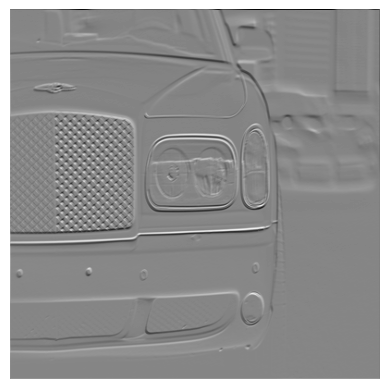

In [2]:
import torch
import torchvision.transforms.functional as TF
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the image
image_path = '/kaggle/input/computer-vision-resources/car_illus.jpg'
image_pil = Image.open(image_path).convert('L')
image_pil = image_pil.resize((400, 400))
image_tensor = TF.to_tensor(image_pil).unsqueeze(0) # Add batch dimension

# Define the kernel (as in the previous step)
kernel = torch.tensor([
    [0, 1, 2],
    [1, 0, -1],
    [-2, -1, 0]], dtype=torch.float32)
kernel = kernel.reshape(1, 1, 3, 3)

# Apply convolution
image_filter = torch.nn.functional.conv2d(
    input=image_tensor,
    weight=kernel,
    stride=1,
    padding='same'
)

# Display the result
plt.imshow(image_filter.squeeze().numpy(), cmap='gray')
plt.axis('off')
plt.show()

# Apply Relu

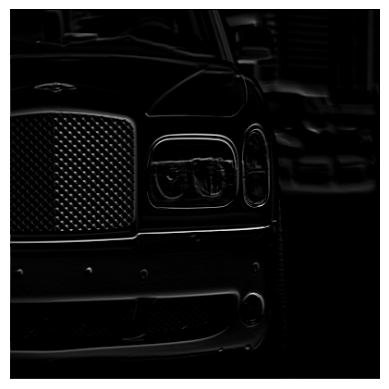

In [4]:
import torch
import torchvision.transforms.functional as TF
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the image (same as above)
image_path = '/kaggle/input/computer-vision-resources/car_illus.jpg'
image_pil = Image.open(image_path).convert('L')
image_pil = image_pil.resize((400, 400))
image_tensor = TF.to_tensor(image_pil).unsqueeze(0)

# Define the kernel
kernel = torch.tensor([
    [0, 1, 2],
    [1, 0, -1],
    [-2, -1, 0]], dtype=torch.float32)
kernel = kernel.reshape(1, 1, 3, 3)

# Apply convolution
image_filter = torch.nn.functional.conv2d(
    input=image_tensor,
    weight=kernel,
    stride=1,
    padding='same'
)

# Apply ReLU
image_detect = torch.nn.functional.relu(image_filter)

# Display the result
plt.imshow(image_detect.squeeze().numpy(), cmap='gray')
plt.axis('off')
plt.show()